In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as MSE
import seaborn as sns
import xgboost
from pandas import read_csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
import csv
from alys import save as SV
from sklearn.model_selection import train_test_split

In [19]:
df_new = read_csv("new_Basetrain.csv", index_col =0)
df_kagg = read_csv("new_kaggtest.csv", index_col =0)

In [20]:
y_trainfull = df_new.SalePriceLog.values.reshape((1453,1))
x_trainfull = df_new.drop(['target','SalePriceLog'], axis=1)
x_test = df_kagg

In [21]:
y_trainfull.shape,x_trainfull.shape,x_test.shape

((1453, 1), (1453, 82), (1459, 82))

In [22]:
x_train, x_val, y_train, y_val = train_test_split(x_trainfull,y_trainfull , test_size=0.3, random_state=42)

In [23]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape 

((1017, 82), (436, 82), (1017, 1), (436, 1))

In [24]:
xgb = xgboost.XGBRegressor(colsample_bytree=0.5, subsample=0.7,
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=1000,
                             reg_alpha=0.1, reg_lambda=0.3, gamma=0.01, 
                             silent=1, random_state =7, nthread = -1)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.01,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1.8, missing=None, n_estimators=1000,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=7,
       reg_alpha=0.1, reg_lambda=0.3, scale_pos_weight=1, seed=None,
       silent=1, subsample=0.7, verbosity=1)

In [25]:
#Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]
f = 'gain'
fi_mod = xgb.get_booster().get_score(importance_type= f)
print(fi_mod)

{'OverallQual': 0.8965443962399161, 'GrLivArea': 0.14936604317255311, 'TotalSF': 0.8061010637397291, 'GarageArea': 0.04555476057112245, 'YearBuilt': 0.21397808271007743, 'GarageCars': 0.9998749112213334, 'T_Overall': 0.3963590861371641, 'GarageType': 1.0384241641414285, '1stFlrSF': 0.03165002642898549, 'ExterQual': 0.634698824672222, 'MSZoning': 0.1354062771741177, 'BsmtQual': 0.26760205176966667, 'CentralAir': 0.3962097586571428, 'Fireplaces': 0.23791216188999995, 'LotArea': 0.06567683590547717, 'OverallCond': 0.14256651969323525, 'KitchenAbvGr': 0.053160524838, 'YearRemodAdd': 0.247452827559703, 'LotFrontage': 0.03325833962593219, 'MoSold': 0.0327656348373913, 'GarageYrBlt': 0.04348183174338029, 'BsmtFinSF1': 0.07606277673201439, 'KitchenQual': 0.22961362808111108, 'T_garage': 0.040743792200892866, 'OpenPorchSF': 0.03731937754224491, 'TotRmsAbvGrd': 0.04281423305923076, 'BsmtFullBath': 0.07507583473714287, 'BsmtCond': 0.03799842495333334, 'GarageCond': 0.02312010543083333, 'EnclosedP

In [26]:
fidf_mod = pandas.DataFrame.from_dict(fi_mod, orient='index',columns=['importance_values'])
selec = fidf_mod['importance_values'].sort_values(ascending=False)[0:30]
selec

GarageType       1.038424
GarageCars       0.999875
OverallQual      0.896544
TotalSF          0.806101
ExterQual        0.634699
T_Overall        0.396359
CentralAir       0.396210
BsmtQual         0.267602
YearRemodAdd     0.247453
Fireplaces       0.237912
KitchenQual      0.229614
YearBuilt        0.213978
GrLivArea        0.149366
OverallCond      0.142567
MSZoning         0.135406
PavedDrive       0.125999
MiscFeature      0.102425
Functional       0.085675
BsmtFinSF1       0.076063
BsmtFullBath     0.075076
BsmtFinType1     0.074642
SaleCondition    0.069120
LotArea          0.065677
KitchenAbvGr     0.053161
HeatingQC        0.048829
GarageQual       0.048183
GarageArea       0.045555
HalfBath         0.044951
2ndFlrSF         0.044671
GarageYrBlt      0.043482
Name: importance_values, dtype: float64

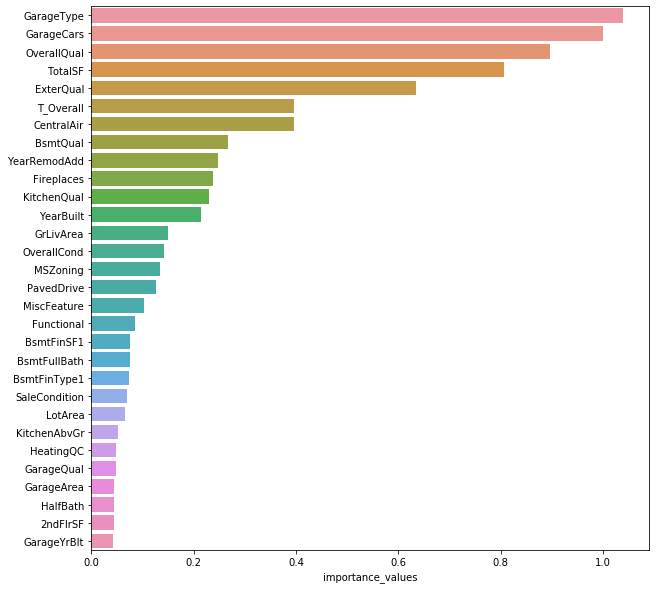

In [27]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=selec ,y=selec.index,)

In [28]:
xgb_pred = xgb.predict(x_val)

In [29]:
RMSE = np.sqrt(MSE(xgb_pred, y_val))
print(RMSE.round(4))     

0.1126


In [30]:
y_test = xgb.predict(x_test)

In [31]:
submission = pd.DataFrame({"Id": df_kagg.index,"SalePrice": np.exp(y_test)})
submission.to_csv("new_kagg10.csv", index= False)